# Get data of heart diase

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

# Lấy data và tiền xử lý

In [2]:
df = pd.read_csv("../datasets/heart_disease.csv")
df = df.drop(columns=['Fruits', 'Veggies', 'AnyHealthcare','NoDocbcCost',  'CholCheck', "Income", "Education"])


# Decision tree

- Xem xét các dữ liệu

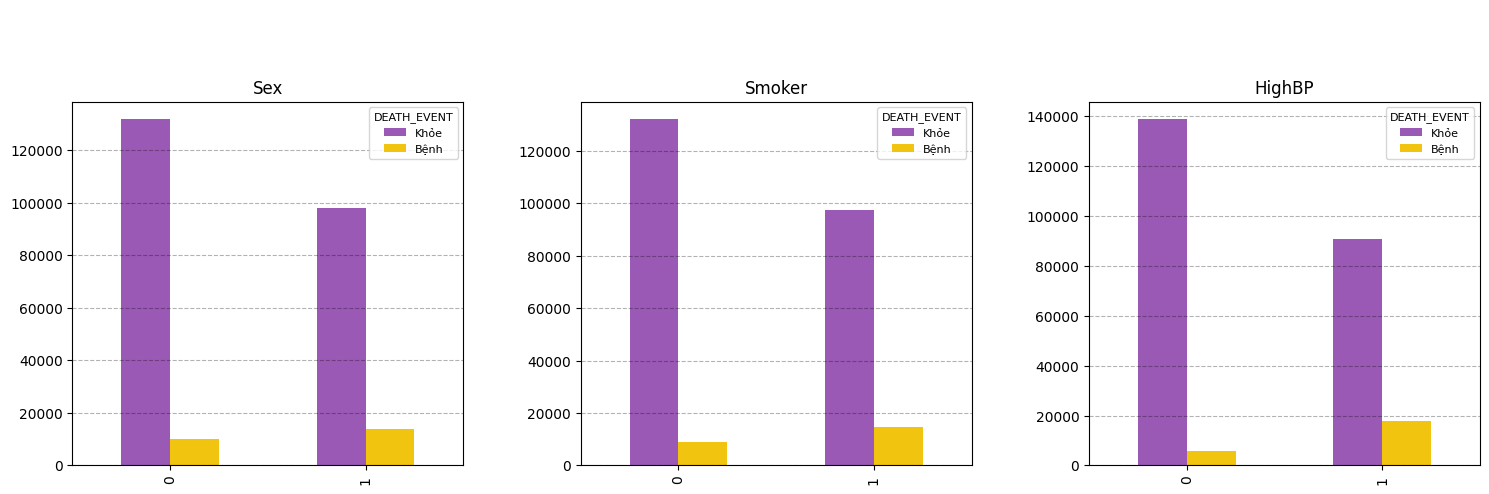

In [3]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.rcParams.update({'text.color': 'black',
                     'axes.labelcolor': 'black',
                     'axes.edgecolor': 'black',
                     'xtick.color': 'black',
                     'ytick.color': 'black'})

# Danh sách các biến cần vẽ
variables = ['Sex', "Smoker","HighBP"]
titles = [ 'Sex', 'Smoker', 'HighBP']

# Vẽ subplot cho từng biến
for i, (var, title) in enumerate(zip(variables, titles)):
    plt.subplot(2, 3, i+1)
    
    counts = pd.crosstab(df[var], df['HeartDiseaseorAttack'])
    
    ax = counts.plot(kind='bar', color=['#9b59b6', '#f1c40f'], ax=plt.gca())
    
    ax.set_title(title, color='black', fontsize=12)
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'])
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='black')
    

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Khỏe', 'Bệnh'], loc='upper right', 
             title='DEATH_EVENT', title_fontsize=8, fontsize=8)


# Thêm tiêu đề chính
plt.suptitle('Count Plot of Discrete Variables', color='white', fontsize=16, x=0.15, y=0.98, ha='left')

# Chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Hiển thị biểu đồ
plt.show()

- Chia tập huấn luyện và huấn luyện model

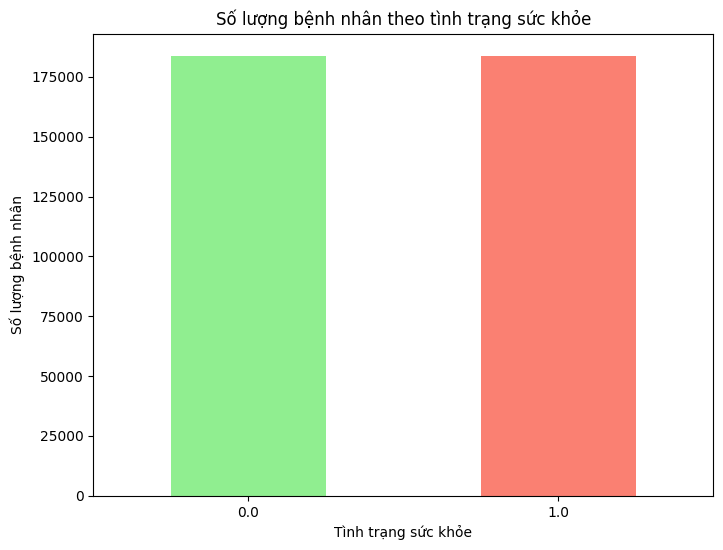

['decision_tree_model.pkl']

In [4]:
X = df.drop('HeartDiseaseorAttack', axis=1)
for x in X.columns:
    X[x] = X[x].astype(int)
y = df['HeartDiseaseorAttack']

# chia tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

disease_counts = y_train.value_counts()
plt.figure(figsize=(8, 6))
disease_counts.plot(kind="bar", color=["lightgreen", "salmon"])
plt.title("Số lượng bệnh nhân theo tình trạng sức khỏe")
plt.xlabel("Tình trạng sức khỏe")
plt.ylabel("Số lượng bệnh nhân")
plt.xticks(rotation=0)
plt.show()

model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'decision_tree_model.pkl')






- Đánh giá model

Accuracy: 0.6885643330179754
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     45968
         1.0       0.20      0.80      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.74      0.56     50736
weighted avg       0.90      0.69      0.75     50736



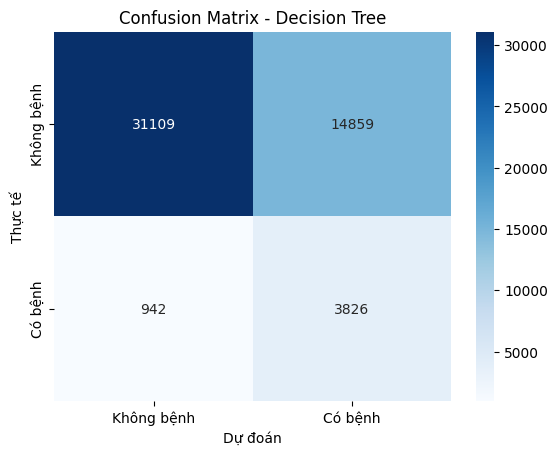

In [5]:
loaded_model = joblib.load('decision_tree_model.pkl')
y_pred = loaded_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Decision Tree")
plt.show()